## Astrostats Lab #1:   
### Cy Gilman

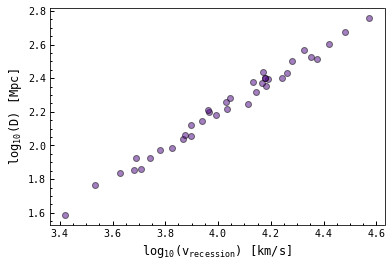

In [327]:
#importing packages, setting graphing parameters, loading data
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from decimal import Decimal


data = np.loadtxt('data.dat')
fig, ax = plt.subplots()
plt.scatter(np.log10(data[:, 2]), np.log10(data[:, 0]), marker='o', alpha=0.5, color='indigo', edgecolor='black')
plt.xlabel('V')
# Column 1 = distance [Mpc]
# Column 2 = error on distance [Mpc]
# Column 3 = velocity [km/s]

def setaxparams(): #axis formatting stuff
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=1, direction='in')
    ax.tick_params(which='major', length=4)
    ax.tick_params(which='minor', length=2, direction='in')
setaxparams()

params = {'mathtext.default': 'regular', 'font.family':'monospace'} #label formatting stuff
plt.rcParams.update(params)
plt.xlabel('$log_{10}(v_{recession})$ [km/s]', fontsize=12)
plt.ylabel('$log_{10}(D)$ [Mpc]', fontsize=12)
plt.savefig('1.pdf')

Best fit line: 0.01535262538467634x + 5.1628098133849445


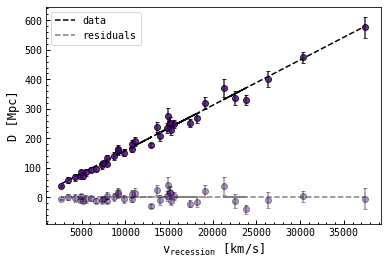

In [328]:
pfit = np.polyfit(data[:,2], data[:,0], deg = 1) #unweighted polyfit
print(f'Best fit line: {pfit[0]}x + {pfit[1]}')

fig, ax = plt.subplots()
setaxparams()
plt.errorbar(data[:,2], data[:,0], yerr = data[:,1], fmt = 'o',
            markerfacecolor='indigo', markeredgecolor='black', alpha=0.8, ecolor='black', capsize=2)
plt.xlabel('$v_{recession}$ [km/s]', fontsize=12)
plt.ylabel('D [Mpc]', fontsize=12)

pfit_line = pfit[0]*data[:,2]+pfit[1] #using slope and intercept from polyfit to plot line
plt.plot(data[:,2], pfit_line, color='black', linestyle='--', label='data')

plt.errorbar(data[:,2], data[:,0]-pfit_line, yerr = data[:,1], fmt = 'o',
             markerfacecolor='indigo', markeredgecolor='black', alpha=0.4, ecolor='black', capsize=2)
plt.plot(data[:,2], np.zeros(data[:,2].shape), color='gray', linestyle='--', label='residuals')#residuals
plt.legend()
plt.savefig('2.pdf')

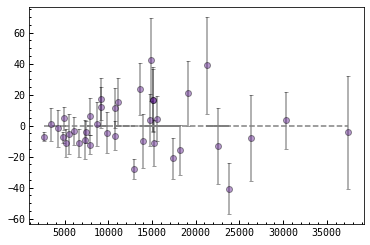

In [329]:
fig, ax = plt.subplots()
setaxparams()
plt.errorbar(data[:,2], data[:,0]-pfit_line, yerr = data[:,1], fmt = 'o',
             markerfacecolor='indigo', markeredgecolor='black', alpha=0.4, ecolor='black', capsize=2 ) 
plt.plot(data[:,2], np.zeros(data[:,2].shape), color='gray', linestyle='--', label='residuals')#residuals
#plot of residuals: raw data with errors, with polyfit line values subtracted

Best fit line: 0.015352625384676358x + 5.162809813384754


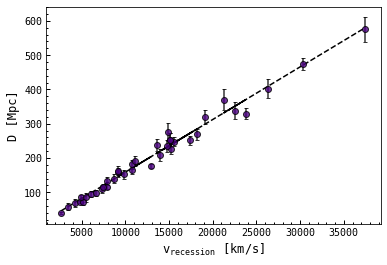

In [330]:
from numpy.linalg import inv
#manual linear least squares fit
Nx = len(data[:,2])
X = np.empty((Nx,2))
X[:,0] = data[:,2]
X[:,1] = 1
manual_pfit = inv(X.T@X)@X.T@data[:,0] #least squares equation
print(f'Best fit line: {manual_pfit[0]}x + {manual_pfit[1]}')

manual_pfit_line = X@manual_pfit #go from slope/intercept to plottable values through matrix multiplication

fig, ax = plt.subplots()
setaxparams()

plt.xlabel('$v_{recession}$ [km/s]', fontsize=12)
plt.ylabel('D [Mpc]', fontsize=12)

plt.errorbar(data[:,2], data[:,0], yerr = data[:,1], fmt = 'o',
            markerfacecolor='indigo', markeredgecolor='black', alpha=0.8, ecolor='black', capsize=2)
plt.plot(data[:,2], manual_pfit_line, color='black', linestyle='--')
plt.savefig('3.pdf')

Covariance Matrix: 
[[ 8.247e-08 -5.688e-04]
 [-5.688e-04  6.053e+00]]


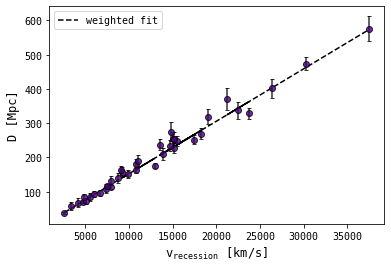

In [331]:
pfit_w = np.polyfit(data[:,2], data[:,0], deg = 1, w = 1/data[:,1], cov = 'unscaled')
#weighted polyfit, with covariance attached -- input 1/errors (program will fix) and unscaled cov, so that
#the package will use the errors we provide
plt.errorbar(data[:,2], data[:,0], yerr = data[:,1], fmt = 'o', 
            markerfacecolor='indigo', markeredgecolor='black', alpha=0.8, ecolor='black', capsize=2)

pfit_line_w = pfit_w[0][0]*data[:,2]+pfit_w[0][1]
plt.plot(data[:,2], pfit_line_w, color='black', linestyle='--', label='weighted fit')
plt.xlabel('$v_{recession}$ [km/s]', fontsize=12)
plt.ylabel('D [Mpc]', fontsize=12)
plt.legend()
plt.savefig('4.pdf')

np.set_printoptions(precision=3)#printing covariance matrix
print ('Covariance Matrix: ')
print (pfit_w[1])

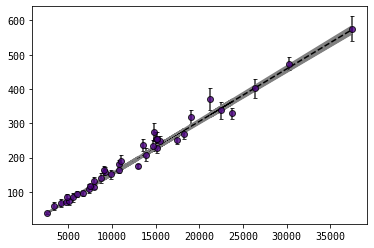

In [332]:
plt.errorbar(data[:,2], data[:,0], yerr = data[:,1], fmt = 'o',
            markerfacecolor='indigo', markeredgecolor='black', alpha=0.8, ecolor='black', capsize=2)
pfit_line_w = pfit_w[0][0]*data[:,2]+pfit_w[0][1]
plt.plot(data[:,2], pfit_line_w, color='black', linestyle='--')
pfit_line_w_plus = (pfit_w[0][0] + np.sqrt(pfit_w[1][0,0]))*data[:,2]+pfit_w[0][1]
pfit_line_w_minus = (pfit_w[0][0] - np.sqrt(pfit_w[1][0,0]))*data[:,2]+pfit_w[0][1]
plt.plot(data[:,2], pfit_line_w_plus, color = 'gray')
plt.plot(data[:,2], pfit_line_w_minus, color = 'gray')
plt.fill_between(data[:,2], pfit_line_w_plus, pfit_line_w_minus, color = 'gray')
#weighted polyfit, with covariance-based errors in the slope on either side
plt.savefig('5.pdf')

In [333]:
age_years = pfit_w[0][0]*(9.77813106e+11)#conversion factor via google
age_error = np.sqrt(pfit_w[1][0,0])*(9.77813106e+11)
#convert units from mpsc*sec/km to years, both with the age and the error
print(f'Age of universe: {Decimal(age_years):.3E} ± {Decimal(age_error):.3E} years')

Age of universe: 1.497E+10 ± 2.808E+8 years


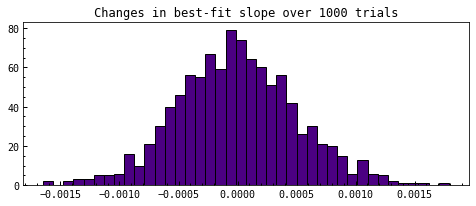

In [334]:
slopes = np.empty(1000)
#bootstrapping! 
for ii in range (0, 1000):
    data_prime = data[:,0].copy()
    for jj in range (0, data.shape[0]):
        data_prime[jj] = data_prime[jj]+np.random.normal(0,data[jj,1])
        #for each trial (ii) permuting each data point(jj) by its error value to create another random data set
    pfit_ii = np.polyfit(data[:,2], data_prime, deg = 1)
    slopes[ii] = pfit_ii[0] #broadcasting to create a set of polyfit values

fig, ax = plt.subplots(figsize=(8, 3))
setaxparams()
plt.hist(slopes-pfit_w[0][0], bins=40, align='left', color='indigo', edgecolor='black',
              linewidth=1)
plt.title('Changes in best-fit slope over 1000 trials')

#subtract the original slope to create histogram of change in best-fit gradient
plt.savefig('6.pdf')

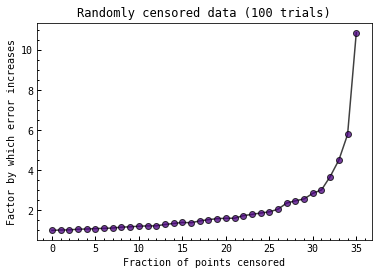

In [335]:
censored_errors = np.empty((data.shape[0]-2, 100))
for ii in range (0, data.shape[0]-2):
    for jj in range(0, 100):
        data_sh = data.copy()
        np.random.shuffle(data_sh)
        data_kk = data_sh[range(ii, data.shape[0])]
        #randomly shuffles the data, then cuts out the first ii entries, thus effectively censoring ii random values
        data_kk_pfit = np.polyfit(data_kk[:,2], data_kk[:,0], deg = 1, w = 1/data_kk[:,1], cov = 'unscaled')
        data_kk_error = data_kk_pfit[1][0,0]
        censored_errors[ii,jj] = np.sqrt(data_kk_error)
        #measuring the errors (std) for each trial
censored_errors_mean = np.nanmean(censored_errors, axis = 1)#take the average for all trials of each size
censored_errors_mean_factor = censored_errors_mean/np.sqrt(pfit_w[1][0,0])

fig, ax = plt.subplots()#plot the above
setaxparams()
plt.plot(range (0, data.shape[0]-2), censored_errors_mean_factor, marker='o', markerfacecolor='indigo', alpha=0.75, 
         markeredgecolor='black', color='black')
plt.title('Randomly censored data (100 trials)')
plt.xlabel('Fraction of points censored')
plt.ylabel('Factor by which error increases')
plt.savefig('7.pdf')
